In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

In [3]:
import numpy as np

In [4]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [6]:
matplotlib.rc('font', **font)

In [7]:
cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Greens"), 
         matplotlib.cm.get_cmap("Purples"), matplotlib.cm.get_cmap("Oranges")]

### Combining two rounds opponents data sets

In [10]:
rnd_opp_files = ["../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_1.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_2.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_3.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_3.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_4.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_5.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_6.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_7.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_8.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_9.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_10.csv"]

In [11]:
dfs = [pd.read_csv(file) for file in rnd_opp_files]

In [13]:
df = pd.concat(dfs)

In [14]:
df.to_csv("../data/clean_two_rounds_opponents.csv")

In [54]:
files = ["../data/clean_expected.csv", 
         "../data/last-round/clean_last_round.csv",
         "../data/clean_two_opponents.csv",
         "../data/clean_sixteen_states_two_rounds.csv",
         "../data/clean_two_rounds_opponents.csv"]

## Analysis of the evolved population

In [55]:
heatmaps = []
extents = []
dfs = []

for file in files:
    df = pd.read_csv(file)
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)
    dfs.append(df)

In [56]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

In [57]:
min_ = 1
max_ = 1391629.0

In [58]:
titles = ["Perfect Memory Payoffs",
          "Limited Memory Payoffs" "\n" "(last round with one other player)",
          "Limited Memory Payoffs" "\n" "(last round with two other players)",
          "Limited Memory Payoffs" "\n" "(last two rounds with one other player)",
          "Limited Memory Payoffs" "\n" "(last two rounds with two other players)"]

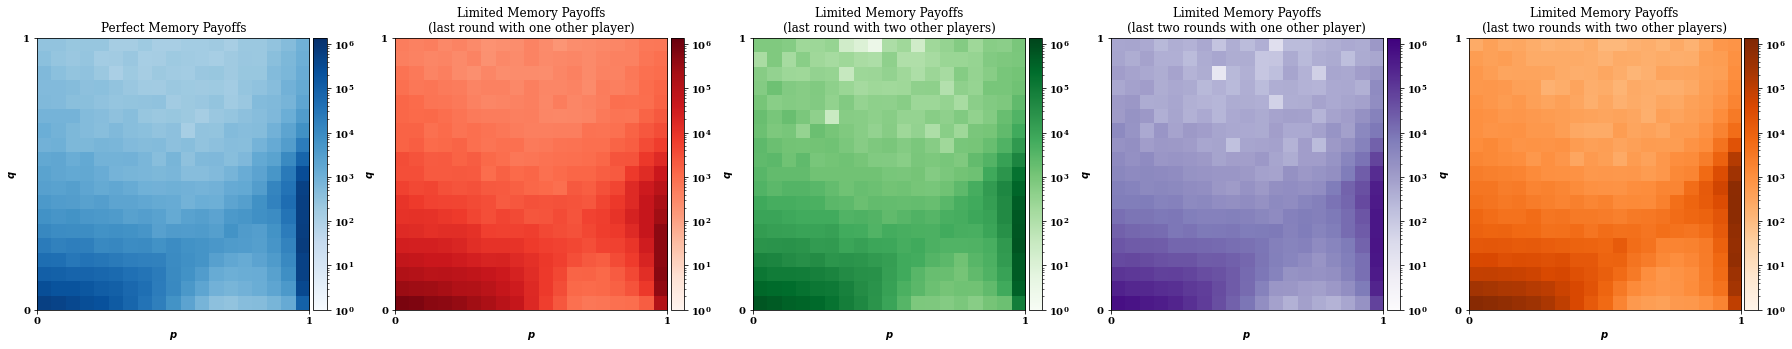

In [59]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 15))

for i, heatmap in enumerate(heatmaps):

    im = axes[i].imshow(heatmap.T, extent=extents[i], origin="lower", cmap=cmaps[i],
                     norm=colors.LogNorm(vmin=min_,vmax=max_))

    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2));
    axes[i].set_xlabel("$p$")
    axes[i].set_ylabel("$q$")
    
    axes[i].set_title(titles[i])

fig.tight_layout()



# fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

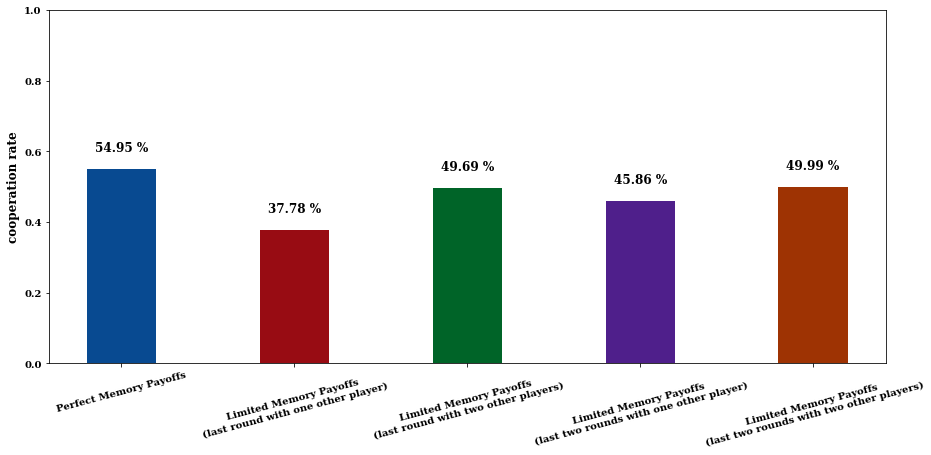

In [60]:
fig, axes = plt.subplots(figsize=(15, 6.5));

height = [sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies']))) for df in dfs]

x_pos = np.arange(len(titles))

axes.bar(x_pos, height, width=0.4, color=bar_colors);

axes.set_ylabel("cooperation rate", weight="bold", fontsize=12);

axes.set_ylim(0, 1);
axes.set_xticks([0, 1, 2, 3, 4]);
axes.set_xticklabels([titles[0], titles[1], titles[2], titles[3], titles[4]], fontsize=10, rotation=15);

for j, pos in enumerate([0, 1, 2, 3, 4]):
    axes.text(pos,
          height[j] + 0.05,
          f"{round(height[j] * 100, 2)} %",
          horizontalalignment='center',
          color="black",
          weight='bold',
          fontsize=12
      )

In [36]:
rnd_opp_files = ["../data/two-rounds-opponents/clean_two_rounds_opponents_seed_1.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_2.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_3.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_4.csv",    
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_5.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_6.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_7.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_8.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_9.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_10.csv"]        

In [37]:
dfs = [pd.read_csv(file) for file in rnd_opp_files]

In [38]:
df = pd.concat(dfs)

In [39]:
df.to_csv("../data/clean_two_rounds_opponents_high_benefit.csv")

In [100]:
files = ["../data/clean_expected_b_10.csv", 
         "../matlab/data/stochastic/clean_c_1_b_10_stochastic_1.csv",
         "../data/clean_two_opponents_b_10.csv",
         "../data/clean_two_rounds_b_10.csv",
         "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_2.csv"]

In [101]:
heatmaps = []
extents = []
dfs = []

for file in files:
    df = pd.read_csv(file)
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)
    dfs.append(df)

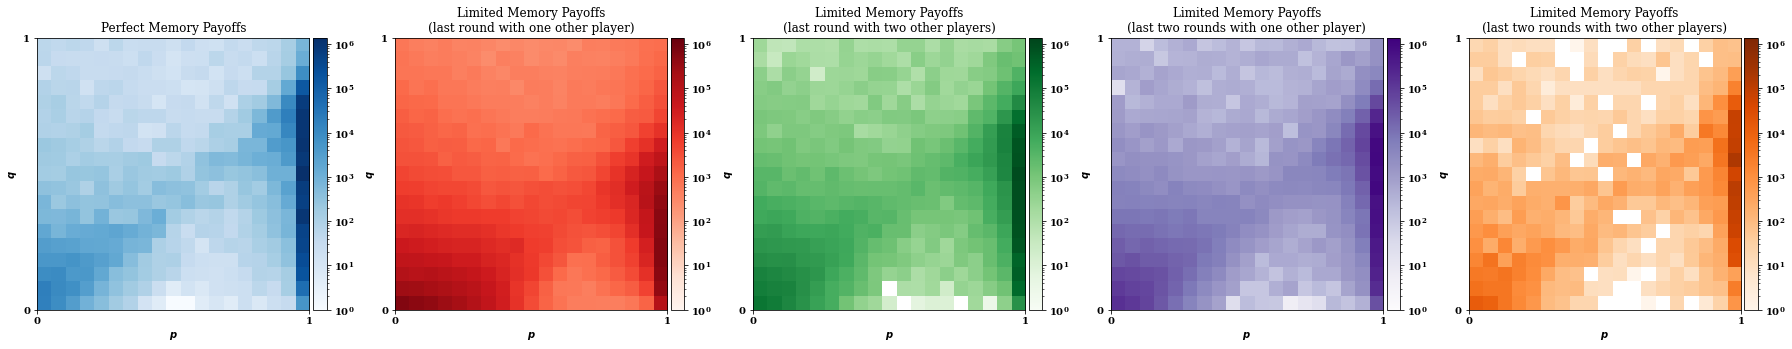

In [102]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 15))

for i, heatmap in enumerate(heatmaps):

    im = axes[i].imshow(heatmap.T, extent=extents[i], origin="lower", cmap=cmaps[i],
                     norm=colors.LogNorm(vmin=min_,vmax=max_))

    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2));
    axes[i].set_xlabel("$p$")
    axes[i].set_ylabel("$q$")
    
    axes[i].set_title(titles[i])

fig.tight_layout()



# fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

In [103]:
files = ["../data/clean_expected_b_10.csv", 
         "../data/last-round/clean_last_round_b_10.csv",
         "../data/clean_two_opponents_b_10.csv",
         "../data/clean_two_rounds_b_10.csv",
         "../data/clean_two_rounds_opponents_high_benefit.csv"]

In [104]:
dfs = [pd.read_csv(file) for file in files]

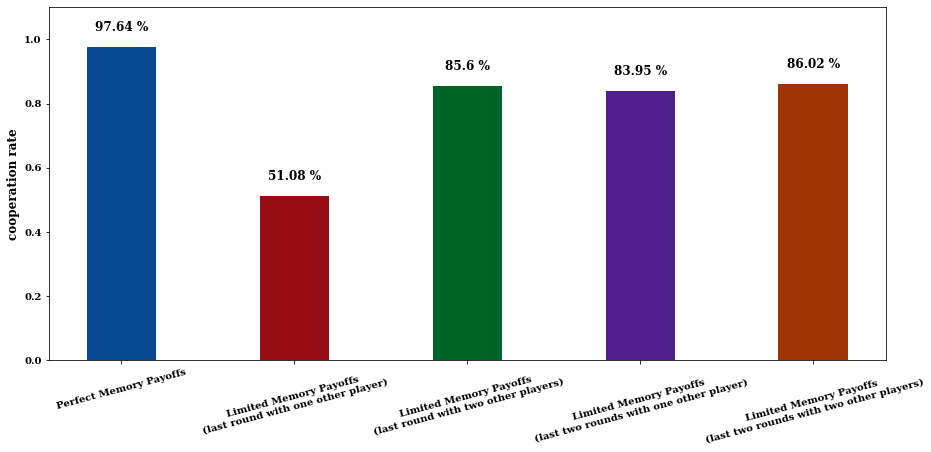

In [105]:
fig, axes = plt.subplots(figsize=(15, 6.5));

height = [sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies']))) for df in dfs]

x_pos = np.arange(len(titles))

axes.bar(x_pos, height, width=0.4, color=bar_colors);

axes.set_ylabel("cooperation rate", weight="bold", fontsize=12);

axes.set_ylim(0, 1.1);
axes.set_xticks([0, 1, 2, 3, 4]);
axes.set_xticklabels([titles[0], titles[1], titles[2], titles[3], titles[4]], fontsize=10, rotation=15);

for j, pos in enumerate([0, 1, 2, 3, 4]):
    axes.text(pos,
          height[j] + 0.05,
          f"{round(height[j] * 100, 2)} %",
          horizontalalignment='center',
          color="black",
          weight='bold',
          fontsize=12
      )